In [42]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import numpy as np


In [12]:
df1 = pd.read_excel('data/Data_TSUM.xlsx', sheet_name='Data_Parsing')
df2 = pd.read_excel('data/Data_TSUM.xlsx', sheet_name='Data_Company')


In [22]:
df1.head()


,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,black,196
4,Valentino,Shoes,aaaaa111115,black,250


In [23]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           75 non-null     object
 1   Category        75 non-null     object
 2   producer_id     75 non-null     object
 3   producer_color  75 non-null     object
 4   price           75 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.1+ KB


In [24]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          75 non-null     object
 1   Category       75 non-null     object
 2   item_id        75 non-null     object
 3   color_id       75 non-null     object
 4   current price  75 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 3.1+ KB


In [20]:
for ch in ['_', '-', '~', '\\', '/']:
    df1['producer_id'] = df1['producer_id'].str.replace(ch, '')

for ch in ['_', '-', '~', '\\', '/']:
    df1['producer_color'] = df1['producer_color'].str.replace(ch, '')


In [14]:
df2.head()


,brand,Category,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153


In [28]:
df = df1.merge(
    df2,
    left_on=['producer_id', 'producer_color'],
    right_on=['item_id', 'color_id']
)


In [59]:
df.head()


,brand_x,Category_x,producer_id,producer_color,price,brand_y,Category_y,item_id,color_id,current price,ration,outlier
0,Valentino,Shoes,aaaaa111111,black,167,Valentino,Shoes,aaaaa111111,black,247,-0.323887,Yes
1,Valentino,Shoes,aaaaa111112,black,188,Valentino,Shoes,aaaaa111112,black,161,0.167702,
2,Valentino,Shoes,aaaaa111113,black,184,Valentino,Shoes,aaaaa111113,black,234,-0.213675,
3,Valentino,Shoes,aaaaa111114,black,196,Valentino,Shoes,aaaaa111114,black,167,0.173653,
4,Valentino,Shoes,aaaaa111115,black,250,Valentino,Shoes,aaaaa111115,black,153,0.633987,Yes


In [53]:
df['ration'] = (df['price']-df['current price'])/df['current price']


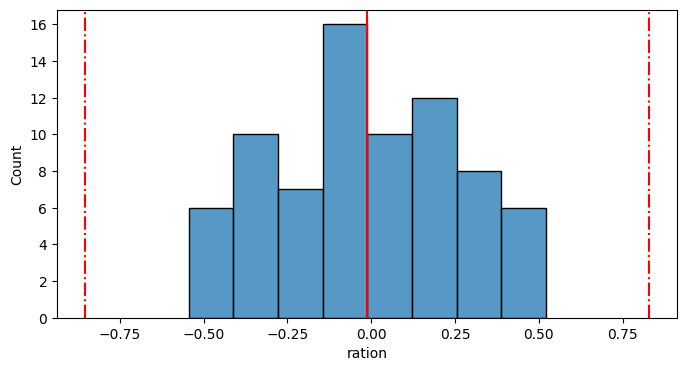

In [47]:
fig=plt.figure(figsize=(8,4))
ll=np.log(df.ration)
hist = sns.histplot(ll)
hist.axvline(ll.mean()-3*ll.std(), color='r', ls='-.')
hist.axvline(ll.mean()+3*ll.std(), color='r', ls='-.')
hist.axvline(ll.mean(), color='r', ls='-')


In [48]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


In [49]:
o, c = outliers_iqr_mod(df, 'ration')


In [51]:
o.shape


(0, 11)

In [52]:
abs(-1)


1

In [58]:
df[abs(df['ration']>0.30)]


,brand_x,Category_x,producer_id,producer_color,price,brand_y,Category_y,item_id,color_id,current price,ration,outlier
4,Valentino,Shoes,aaaaa111115,black,250,Valentino,Shoes,aaaaa111115,black,153,0.633987,Yes
12,Valentino,Shoes,aaaaa111123,white,288,Valentino,Shoes,aaaaa111123,white,171,0.684211,Yes
16,Valentino,Bags,aaaaa111127,red,293,Valentino,Bags,aaaaa111127,red,203,0.443350,Yes
20,Valentino,Bags,aaaaa111131,red,256,Valentino,Bags,aaaaa111131,red,189,0.354497,Yes
24,Valentino,Bags,aaaaa111135,red,225,Valentino,Bags,aaaaa111135,red,153,0.470588,Yes
31,Brioni,Shoes,bbbbb111117,black,291,Brioni,Shoes,bbbbb111117,black,198,0.469697,Yes
38,Brioni,Shoes,bbbbb111124,white,298,Brioni,Shoes,bbbbb111124,white,183,0.628415,Yes
42,Brioni,Bags,bbbbb111128,red,272,Brioni,Bags,bbbbb111128,red,204,0.333333,Yes
45,Brioni,Bags,bbbbb111131,red,257,Brioni,Bags,bbbbb111131,red,157,0.636943,Yes
55,Stone Island,Shoes,sssss111116,black,288,Stone Island,Shoes,sssss111116,black,185,0.556757,Yes


In [57]:
df['outlier'] = df['ration'].apply(lambda x: 'Yes' if abs(x)>0.3 else '')


In [60]:
df.to_excel('data/Data_TSUM_NEW.xlsx')


In [61]:
df0=pd.read_excel('data/Data_TSUM_NEW.xlsx')


In [62]:
df.head()


,brand_x,Category_x,producer_id,producer_color,price,brand_y,Category_y,item_id,color_id,current price,ration,outlier
0,Valentino,Shoes,aaaaa111111,black,167,Valentino,Shoes,aaaaa111111,black,247,-0.323887,Yes
1,Valentino,Shoes,aaaaa111112,black,188,Valentino,Shoes,aaaaa111112,black,161,0.167702,
2,Valentino,Shoes,aaaaa111113,black,184,Valentino,Shoes,aaaaa111113,black,234,-0.213675,
3,Valentino,Shoes,aaaaa111114,black,196,Valentino,Shoes,aaaaa111114,black,167,0.173653,
4,Valentino,Shoes,aaaaa111115,black,250,Valentino,Shoes,aaaaa111115,black,153,0.633987,Yes
